# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계3 : Text classification

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * Machine Learning
>> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
> * Deep Learning
>> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
>> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
>> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)
>> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)

## 1. 개발 환경 설정

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 18.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=21a8315a9001104afb6b4fccb7733b25ae1446a488b289775609dde83b59890d
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [2]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget,os
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import wget,os

### 1-3. 한글 글꼴 설정(Windows)

In [3]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

In [4]:
# !sudo apt-get install -y fonts-nanum

### 1-4. 자바 경로 설정(Windows)

In [5]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [6]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (53.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and dir

In [7]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. 전처리한 데이터 불러오기
* 1, 2일차에 전처리한 데이터를 불러옵니다.
* sparse data에 대해서는 scipy.sparse.load_npz 활용

In [9]:
df = pd.read_csv('/content/drive/MyDrive/KT_aivle/딥러닝/RNN/미니프로젝트/train.csv')
df.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


In [10]:
import scipy.sparse as sp
from scipy.sparse import load_npz


X_N = np.load('/content/drive/MyDrive/KT_aivle/딥러닝/RNN/미니프로젝트/X_N.npy')
X_S = np.load('/content/drive/MyDrive/KT_aivle/딥러닝/RNN/미니프로젝트/X_S.npy')
X_E = np.load('/content/drive/MyDrive/KT_aivle/딥러닝/RNN/미니프로젝트/X_E.npy')

In [11]:
X_N

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
X_S

array([[  0,   0,   0, ..., 478, 130,   1],
       [  0,   0,   0, ...,   7,  53, 525],
       [  0,   0,   0, ..., 147, 148, 229],
       ...,
       [  0,   0,   0, ..., 669, 250,   2],
       [  0,   0,   0, ..., 111, 169,  55],
       [  0,   0,   0, ...,  61,  18, 254]], dtype=int32)

In [13]:
X_E

array([[-0.28081128,  0.5227415 ,  0.0809539 , ..., -0.50150156,
         0.30083305, -0.2604486 ],
       [-0.39183688,  0.6289505 ,  0.12893607, ..., -0.6029913 ,
         0.26405725, -0.36478755],
       [-0.20637584,  0.32704148,  0.05727846, ..., -0.3038438 ,
         0.12806478, -0.19951135],
       ...,
       [-0.27682975,  0.45792797,  0.08505732, ..., -0.4685177 ,
         0.2119052 , -0.25678077],
       [-0.2946043 ,  0.46398848,  0.08300617, ..., -0.4255537 ,
         0.18913946, -0.29227725],
       [-0.3123301 ,  0.52390933,  0.00986394, ..., -0.36633334,
         0.20219661, -0.3131566 ]], dtype=float32)

In [14]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

df['label'] = df['label'].map(label_dict)
df.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [15]:
y = df['label']
y

0       0
1       1
2       0
3       0
4       0
       ..
3701    0
3702    3
3703    2
3704    4
3705    2
Name: label, Length: 3706, dtype: int64

* train test 분리

In [16]:
from sklearn.model_selection import train_test_split
X_N_train, X_N_test, X_S_train, X_S_test, X_E_train, X_E_test, y_train, y_test = train_test_split(X_N, X_S, X_E, y, test_size=0.25, random_state=1)

X_N_train.shape, X_N_test.shape, X_S_train.shape, X_S_test.shape, X_E_train.shape, X_E_test.shape, y_train.shape, y_test.shape

((2779, 20432),
 (927, 20432),
 (2779, 613),
 (927, 613),
 (2779, 100),
 (927, 100),
 (2779,),
 (927,))

In [17]:
y_train

2313    0
470     0
3665    0
3407    3
3433    0
       ..
2763    4
905     1
1096    0
235     3
1061    0
Name: label, Length: 2779, dtype: int64

## 3. Machine Learning(N-grams)
* N-gram으로 전처리한 데이터를 이용하여 3개 이상의 Machine Learning 모델 학습 및 성능 분석
> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

In [18]:
from sklearn.metrics import *

### 3-1. Model 1

* RandomForest

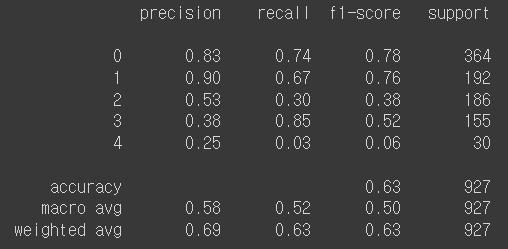

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)

rfc.fit(X_N_train, y_train)
y_pred = rfc.predict(X_N_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71       364
           1       0.91      0.41      0.56       192
           2       0.72      0.19      0.31       186
           3       0.27      0.97      0.42       155
           4       0.33      0.03      0.06        30

    accuracy                           0.52       927
   macro avg       0.63      0.44      0.41       927
weighted avg       0.75      0.52      0.53       927



In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)

rfc.fit(X_S_train, y_train)
y_pred = rfc.predict(X_S_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.89      0.58       364
           1       0.27      0.09      0.13       192
           2       0.36      0.17      0.23       186
           3       0.35      0.04      0.07       155
           4       0.75      0.20      0.32        30

    accuracy                           0.42       927
   macro avg       0.43      0.28      0.27       927
weighted avg       0.38      0.42      0.32       927



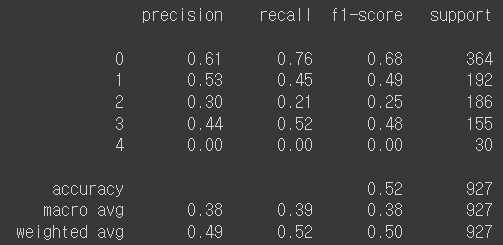

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)

rfc.fit(X_E_train, y_train)
y_pred = rfc.predict(X_E_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       364
           1       0.48      0.44      0.46       192
           2       0.38      0.24      0.29       186
           3       0.44      0.55      0.49       155
           4       0.00      0.00      0.00        30

    accuracy                           0.53       927
   macro avg       0.38      0.40      0.39       927
weighted avg       0.50      0.53      0.51       927



### 3-2. Model 2

In [46]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state=1)

svc.fit(X_N_train, y_train)
y_pred = svc.predict(X_N_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.55      0.69       364
           1       0.88      0.34      0.49       192
           2       0.28      0.93      0.43       186
           3       0.75      0.06      0.11       155
           4       0.25      0.03      0.06        30

    accuracy                           0.48       927
   macro avg       0.61      0.38      0.35       927
weighted avg       0.73      0.48      0.48       927



In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',random_state=1)

svc.fit(X_S_train, y_train)
y_pred = svc.predict(X_S_test)

print(classification_report(y_test, y_pred))

In [23]:
from sklearn.svm import SVC
svc = SVC(random_state=1)

svc.fit(X_E_train, y_train)
y_pred = svc.predict(X_E_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.90      0.62       364
           1       0.55      0.12      0.20       192
           2       0.58      0.04      0.07       186
           3       0.37      0.45      0.40       155
           4       0.00      0.00      0.00        30

    accuracy                           0.46       927
   macro avg       0.40      0.30      0.26       927
weighted avg       0.48      0.46      0.37       927



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3-3. Model 3

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=1)

LR.fit(X_N_train, y_train)
y_pred = LR.predict(X_N_test)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=1)

LR.fit(X_S_train, y_train)
y_pred = LR.predict(X_S_test)

print(classification_report(y_test, y_pred))

In [25]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=1)

LR.fit(X_E_train, y_train)
y_pred = LR.predict(X_E_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.81      0.66       364
           1       0.36      0.37      0.36       192
           2       0.32      0.11      0.16       186
           3       0.33      0.28      0.30       155
           4       0.00      0.00      0.00        30

    accuracy                           0.46       927
   macro avg       0.31      0.31      0.30       927
weighted avg       0.41      0.46      0.42       927



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

### 3-4. Hyperparameter Tuning(Optional) 
* Manual Search, Grid search, Bayesian Optimization, TPE...
> * [grid search tutorial sklearn](https://scikit-learn.org/stable/modules/grid_search.html)
> * [optuna tutorial](https://optuna.org/#code_examples)
> * [ray-tune tutorial](https://docs.ray.io/en/latest/tune/examples/tune-sklearn.html)

In [27]:
from sklearn.model_selection import GridSearchCV

In [29]:
# RandomForestClassifier 모델 생성
rf = RandomForestClassifier()

# 탐색할 하이퍼파라미터 값들을 딕셔너리 형태로 지정
params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 3, 5, 50]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(rf, params, cv=5)

# GridSearchCV 모델 학습
grid_search.fit(X_E_train, y_train)

# 최적의 파라미터와 최고의 교차 검증 점수 출력
print("Best parameters: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 50, 'n_estimators': 200}
Best CV score:  0.5397802838810033


## 4. Deep Learning(Sequence)
* Sequence로 전처리한 데이터를 이용하여 DNN, 1-D CNN, LSTM 등 3가지 이상의 deep learning 모델 학습 및 성능 분석
> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)

In [33]:
import tensorflow as tf

In [34]:
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding
from tensorflow.keras.layers import Conv1D, MaxPool1D
from keras.optimizers import RMSprop
from tensorflow.keras.models import Model, Sequential

In [ ]:
X_N_train.shape, y_train.shape

In [ ]:
np.unique(y_train)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   restore_best_weights=True)

### 4-1. DNN

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=(50132)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_N_train, y_train, epochs=100, callbacks=[es], batch_size=32, validation_split=0.2)

pred = model.predict(X_N_test)

In [ ]:
print(f1_score(y_test, y_pred, average='macro'))

### 4-2. 1-D CNN

In [ ]:
inputs = Input(shape=(X_N_train.shape[1],))
# 임베딩 층
x = Embedding(input_dim=20000, output_dim=50)(inputs)
# 합성곱 층
x = Conv1D(filters=64, kernel_size=5 , padding='valid', activation='tanh')(x)
x = MaxPool1D(pool_size=4)(x)
# 추가적인 합성곱 층과 풀링 층 추가
x = Conv1D(filters=32, kernel_size=5, padding='valid', activation='tanh')(x)
x = MaxPool1D()(x)

# 완전 연결층
x = Dense(64, activation='relu')(x)

# 출력층
output = Dense(5, activation='softmax')(x)

# 모델 생성
model = Model(inputs, output)

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50132)]           0         
                                                                 
 embedding_1 (Embedding)     (None, 50132, 50)         1000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 50128, 64)         16064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12532, 64)        0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12532, 64)         0         
                                                                 
 conv1d_3 (Conv1D)           (None, 12528, 32)         10272     
                                                             

In [ ]:
model.fit(X_N_train, y_train, epochs=100, callbacks=[es], batch_size=32, validation_split=0.2)

Epoch 1/100
70/70 [==============================] - 24s 231ms/step - loss: 1.4228 - accuracy: 0.4224 - val_loss: 1.3646 - val_accuracy: 0.4658
Epoch 2/100
70/70 [==============================] - 13s 186ms/step - loss: 1.3552 - accuracy: 0.4318 - val_loss: 1.1745 - val_accuracy: 0.5270
Epoch 3/100
70/70 [==============================] - 12s 175ms/step - loss: 1.2614 - accuracy: 0.4615 - val_loss: 1.1790 - val_accuracy: 0.5252
Epoch 4/100
70/70 [==============================] - 13s 183ms/step - loss: 1.2453 - accuracy: 0.4656 - val_loss: 1.1889 - val_accuracy: 0.5180
Epoch 5/100
70/70 [==============================] - 13s 179ms/step - loss: 1.2331 - accuracy: 0.4759 - val_loss: 1.2000 - val_accuracy: 0.5252
Epoch 6/100
70/70 [==============================] - 12s 174ms/step - loss: 1.2331 - accuracy: 0.4602 - val_loss: 1.1857 - val_accuracy: 0.5234
Epoch 7/100
70/70 [==============================] - 13s 183ms/step - loss: 1.2289 - accuracy: 0.4588 - val_loss: 1.1693 - val_accuracy:

### 4-3. LSTM

In [32]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GRU, Bidirectional, Dense, Dropout, concatenate
from keras.models import Model

# 입력 데이터의 shape 설정
inputs = Input(shape=(X_E_train.shape[1],))

# 임베딩 층
x = Embedding(input_dim=20000, output_dim=50)(inputs)

# 양방향 GRU
x1 = Bidirectional(GRU(32, return_sequences=True))(x)
x2 = Bidirectional(GRU(32, return_sequences=True, go_backwards=True))(x)

# Concatenate layer를 이용하여 양방향 GRU의 결과를 합침
x = concatenate([x1, x2])

# Conv1D와 MaxPooling1D를 이용하여 feature를 추출
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(4)(x)

# GRU
x = GRU(32)(x)

# 출력층
outputs = Dense(5, activation='softmax')(x)

# 모델 생성
model = Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 50)      1000000     ['input_2[0][0]']                
                                                                                                  
 bidirectional_2 (Bidirectional  (None, 100, 64)     16128       ['embedding_1[0][0]']            
 )                                                                                                
                                                                                                  
 bidirectional_3 (Bidirectional  (None, 100, 64)     16128       ['embedding_1[0][0]']      

In [36]:
model.fit(X_E_train, y_train, epochs=100, callbacks=[es], batch_size=32, validation_split=0.2)

Epoch 1/100
70/70 [==============================] - 27s 82ms/step - loss: 1.4077 - accuracy: 0.4269 - val_loss: 1.3330 - val_accuracy: 0.4658
Epoch 2/100
70/70 [==============================] - 2s 24ms/step - loss: 1.3506 - accuracy: 0.4413 - val_loss: 1.2900 - val_accuracy: 0.5000
Epoch 3/100
70/70 [==============================] - 1s 21ms/step - loss: 1.3292 - accuracy: 0.4498 - val_loss: 1.3052 - val_accuracy: 0.3975
Epoch 4/100
70/70 [==============================] - 2s 23ms/step - loss: 1.3241 - accuracy: 0.4503 - val_loss: 1.2726 - val_accuracy: 0.5000
Epoch 5/100
70/70 [==============================] - 2s 30ms/step - loss: 1.3277 - accuracy: 0.4530 - val_loss: 1.2785 - val_accuracy: 0.5036
Epoch 6/100
70/70 [==============================] - 2s 35ms/step - loss: 1.3179 - accuracy: 0.4530 - val_loss: 1.2696 - val_accuracy: 0.5018
Epoch 7/100
70/70 [==============================] - 3s 46ms/step - loss: 1.3151 - accuracy: 0.4557 - val_loss: 1.2579 - val_accuracy: 0.5000
Epoch

In [37]:
pred = model.predict(X_E_test)

29/29 [==============================] - 2s 12ms/step


array([[0.41240054, 0.2651771 , 0.18072394, 0.11518396, 0.02651444],
       [0.09380869, 0.09429284, 0.28649047, 0.49911293, 0.02629506],
       [0.42850357, 0.12071081, 0.26349112, 0.16994989, 0.01734459],
       ...,
       [0.41240054, 0.2651771 , 0.18072394, 0.11518396, 0.02651444],
       [0.41240054, 0.2651771 , 0.18072394, 0.11518396, 0.02651444],
       [0.36833534, 0.0781005 , 0.30890056, 0.23567034, 0.00899323]],
      dtype=float32)

In [48]:
y_pred = pred.argmax(axis=1)

In [49]:
print(f1_score(y_test, y_pred, average='macro'))

0.1694195561983786


## 5. Using pre-trained model(Optional)
* 한국어 pre-trained model로 fine tuning 및 성능 분석
> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)
> * [HuggingFace-Korean](https://huggingface.co/models?language=korean)

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics import accuracy_score

# 모델 하이퍼파라미터 설정
MAX_LEN = 128
BATCH_SIZE = 16
EPOCHS = 5
LR = 2e-5

# GPU 사용 여부
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 모델 입력 데이터 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained('monologg/kobert')

# 모델 구성
class KoBERTClassifier(nn.Module):
    def __init__(self):
        super(KoBERTClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained('monologg/kobert')
        self.dropout = nn.Dropout(0.1)
        self.linear = nn.Linear(768, 5)
    
    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(input_ids, attention_mask)[1]
        dropout_output = self.dropout(bert_output)
        linear_output = self.linear(dropout_output)
        return linear_output

# 모델 객체 생성
model = KoBERTClassifier().to(DEVICE)

# 손실 함수와 최적화 알고리즘 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# 훈련 데이터셋 DataLoader 객체 생성
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_E_train), torch.tensor(y_train))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# 테스트 데이터셋 DataLoader 객체 생성
test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_E_test), torch.tensor(y_test))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 모델 학습 및 평가
for epoch in range(EPOCHS):
    # 훈련 모드 설정
    model.train()
    
    # 배치 단위로 학습 진행
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=(inputs > 0))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    # 평가 모드 설정
    model.eval()
    preds, targets = [], []
    
    # 배치 단위로 예측 진행
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs, attention_mask=(inputs > 0))
            preds.append(outputs.argmax(dim=-1).cpu().numpy())
            targets.append(labels.cpu().numpy())
    
    # 예측 결과 평가
    preds = np.concatenate(preds)
    targets = np.concatenate(targets)
    accuracy = accuracy_score(targets, preds)
    
    print(f'Epoch {epoch+1}/{EPOCHS}: Accuracy = {accuracy:.4f}')


ModuleNotFoundError: ignored